# Script to explore and visualize the output of the SPA tool

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Looking at raw Survey Data

In [2]:
survey_data_dir = 'data/raw'
survey_person_file = os.path.join(survey_data_dir, 'person.csv')

survey_person_df = pd.read_csv(survey_person_file)
survey_person_df.head()

survey_place_file = os.path.join(survey_data_dir,'place.csv')
survey_place_df = pd.read_csv(survey_place_file)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw\\person_sanitized_pw_imputed.csv'

In [3]:
emply_dict = {
    -8: "I don't know",
    -7: "I Prefer not to answer",
    1: "Yes",
    2: "No"
}
pertype_dict = {
    -9: "NOT ASCERTAINED",
    1: "Full-time Worker",
    2: "Part-time Worker",
    3: "University Student",
    4: "Non-Worker",
    5: "Retiree",
    6: "Driving Age Child",
    7: "Pre-driving Age Child",
    8: "Preschool Child"
}

emply_pertype_ct = pd.crosstab(
        index=survey_person_df['EMPLY'],
        columns=survey_person_df['PERTYPE'],
        margins=True)
emply_pertype_ct.rename(index=emply_dict, columns=pertype_dict, inplace=True)
emply_pertype_ct

PERTYPE,NOT ASCERTAINED,Full-time Worker,University Student,Non-Worker,Retiree,Driving Age Child,All
EMPLY,,,,,,,
I don't know,33,0,2,2,1,0,38
I Prefer not to answer,162,0,15,4,2,3,186
Yes,203,12174,1200,0,0,148,13725
No,91,0,799,3418,4932,499,9739
All,489,12174,2016,3424,4935,650,23688


In [34]:
survey_person_df.head()

,Unnamed: 0,SAMPNO,PERNO,AGE,AAGE,AGE_AAGE,AGE18,SEX,LIC,NOLIC,NOLIC_O,DRIVE,NODRIVE,NODRIVE_O,EMPLY,EMPYTYPE,EMPYTYPE_O,JOBS,EMPLYNOJOB,WKSTAT,WKSTAT_O,WPLACE,WMODE,WMODE_O,INDUS,INDUS_O,DELIV_DRIV,TCOFF,TCDAYS,STUDE,SCHOL,SCHOL_O,SLOC,SWEB,SMODE,SMODE_O,EDUC,EDUC_O,NOGOWHY,NOGOWHY_O,PERTRIPS,PERTYPE,PERRKWT0,PW
0,0,2000400,1,62,NaN,4,NaN,1,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,6,5,210.662068,0.0
1,1,2000402,1,28,NaN,4,NaN,1,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,1.0,NaN,54.0,NaN,2.0,1.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,2,1,686.933069,0.0
2,2,2000402,2,27,NaN,4,NaN,2,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,4.0,NaN,81.0,NaN,1.0,2.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,2,1,608.697218,0.0
3,3,2000677,1,54,NaN,4,NaN,1,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,0.0,NaN,1.0,4.0,NaN,54.0,NaN,2.0,2.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,7,1,75.008082,0.0
4,4,2000677,2,50,NaN,4,NaN,2,1.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,0.0,NaN,1.0,4.0,NaN,61.0,NaN,2.0,2.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,1,68.045671,0.0


In [37]:
tot_workers = survey_person_df[survey_person_df['EMPLY'] == 1]['PERRKWT0'].sum()
inferred_pt_workers = survey_person_df[(survey_person_df['EMPLY'] == 1) & (survey_person_df['PERTYPE'] != 1)]['PERRKWT0'].sum()
print("total workers: ", tot_workers)
print("inferred part-time workers", inferred_pt_workers)
print("percent of pt workers:", inferred_pt_workers/tot_workers*100)

total workers:  2075721.39028
inferred part-time workers 310249.32848500006
percent of pt workers: 14.946578569638849


In [4]:
wkstat_dict = {
    -8: "I don't know",
    -7: "I Prefer not to answer",
    0: "Worker, incl. self employed",
    1: "Retired",
    2: "Homemaker",
    3: "Unemployed but looking for work",
    4: "Unemployed, not seeking employment",
    5: "Student (part- or full-time)",
    6: "Disabled non-worker",
    97: "Something else"
}

wkstat_pertype_ct = pd.crosstab(
        index=survey_person_df['WKSTAT'],
        columns=survey_person_df['PERTYPE'],
        margins=True)
wkstat_pertype_ct.rename(index=wkstat_dict, columns=pertype_dict, inplace=True)
wkstat_pertype_ct

PERTYPE,NOT ASCERTAINED,Full-time Worker,University Student,Non-Worker,Retiree,Driving Age Child,All
WKSTAT,,,,,,,
I don't know,3,0,2,26,0,1,32
I Prefer not to answer,15,0,2,87,0,2,106
"Worker, incl. self employed",217,12174,1200,0,0,147,13738
Retired,24,0,34,0,4935,0,4993
Homemaker,2,0,19,1365,0,0,1386
Unemployed but looking for work,6,0,39,652,0,13,710
"Unemployed, not seeking employment",3,0,1,133,0,8,145
Student (part- or full-time),12,0,677,28,0,472,1189
Disabled non-worker,1,0,26,1133,0,4,1164


In [5]:
age_pertype_ct = pd.crosstab(
        index=survey_person_df['AGE'],
        columns=survey_person_df['PERTYPE'],
        margins=True)
age_pertype_ct.rename(columns=pertype_dict, inplace=True)
age_pertype_ct

PERTYPE,NOT ASCERTAINED,Full-time Worker,University Student,Non-Worker,Retiree,Driving Age Child,Pre-driving Age Child,Preschool Child,All
AGE,,,,,,,,,
-8,8,20,7,14,4,0,1,1,55
-7,190,540,92,164,262,44,307,87,1686
0,0,0,0,0,0,0,0,315,315
1,0,0,0,0,0,0,0,248,248
2,0,0,0,0,0,0,0,325,325
3,0,0,0,0,0,0,0,293,293
4,0,0,0,0,0,0,0,332,332
5,0,0,0,0,0,0,245,0,245
6,0,0,0,0,0,0,266,0,266


## Reading in the SPA data

In [6]:
output_data_dir = 'E:/Projects/Clients/SEMCOG/Data/FromClient/HouseholdTravelSurvey/SPA_processed/trip_purp_no_distance/'
error_log_file = os.path.join(output_data_dir, 'error_log.txt')
hh_file = os.path.join(output_data_dir, 'households.csv')
joint_ultrips_file = os.path.join(output_data_dir, 'joint_ultrips.csv')
persons_file = os.path.join(output_data_dir, 'persons.csv')
tours_file = os.path.join(output_data_dir, 'tours.csv')
trips_file = os.path.join(output_data_dir, 'trips.csv')
unique_joint_tours_file = os.path.join(output_data_dir, 'unique_joint_tours.csv')
unique_joint_ultrips_file = os.path.join(output_data_dir, 'unique_joint_ultrips.csv')

hh_df = pd.read_csv(hh_file)
joint_utrips_df = pd.read_csv(joint_ultrips_file)
persons_df = pd.read_csv(persons_file)
tours_df = pd.read_csv(tours_file)
trips_df = pd.read_csv(trips_file)
unique_joint_tours_df = pd.read_csv(unique_joint_tours_file)
unique_joint_ultrips_df = pd.read_csv(unique_joint_ultrips_file)

output_data_dir_with_dist = 'E:/Projects/Clients/SEMCOG/Data/FromClient/HouseholdTravelSurvey/SPA_processed/trip_purp_with_distance/'
tours_dist_file = os.path.join(output_data_dir_with_dist, 'tours.csv')
trips_dist_file = os.path.join(output_data_dir_with_dist, 'trips.csv')
tours_dist_df = pd.read_csv(tours_dist_file)
trips_dist_df = pd.read_csv(trips_dist_file)

In [7]:
hh_df.head()

,HH_ID,NUM_PERS,AREA
0,1,1,0
1,2,2,0
2,3,2,0
3,4,1,0
4,5,1,0


In [8]:
persons_df.head()

,HH_ID,PER_ID,PERSONTYPE,AGE,EMPLY,HOURS_CAT,EMP_CAT,STUDE,SCHOL,STU_CAT,PERSONTYPE0,EMP_CAT0,STU_CAT0,ERROR
0,1,1,4.0,62,3,3,3,0,0,3,NaN,NaN,NaN,NaN
1,2,1,1.0,28,1,1,1,0,0,3,NaN,NaN,NaN,NaN
2,2,2,1.0,27,1,1,1,0,0,3,NaN,NaN,NaN,NaN
3,3,1,1.0,54,1,1,1,0,0,3,NaN,NaN,NaN,NaN
4,3,2,1.0,50,1,1,1,0,0,3,NaN,NaN,NaN,NaN


In [9]:
trips_df.head()

,HH_ID,PER_ID,TOUR_ID,TRIP_ID,ORIG_PLACENO,ORIG_X,ORIG_Y,ORIG_TAZ,ORIG_MAZ,DEST_PLACENO,DEST_X,DEST_Y,DEST_TAZ,DEST_MAZ,ORIG_PURP,DEST_PURP,ORIG_ARR_HR,ORIG_ARR_MIN,ORIG_ARR_BIN,ORIG_DEP_HR,ORIG_DEP_MIN,ORIG_DEP_BIN,DEST_ARR_HR,DEST_ARR_MIN,DEST_ARR_BIN,DEST_DEP_HR,DEST_DEP_MIN,DEST_DEP_BIN,TRIP_DUR_HR,TRIP_DUR_MIN,TRIP_DUR_BIN,TRIPMODE,ISDRIVER,CHAUFFUER_ID,AUTO_OCC,TOURMODE,TOURPURP,BOARDING_PLACENO,BOARDING_PNAME,BOARDING_X,BOARDING_Y,BOARDING_TAP,ALIGHTING_PLACENO,ALIGHTING_PNAME,ALIGHTING_X,ALIGHTING_Y,ALIGHTING_TAP,TRANSIT_NUM_XFERS,TRANSIT_ROUTE_1,TRANSIT_MODE_1,XFER_1_PLACENO,XFER_1_PNAME,XFER_1_X,XFER_1_Y,XFER_1_TAP,TRANSIT_ROUTE_2,TRANSIT_MODE_2,XFER_2_PLACENO,XFER_2_PNAME,XFER_2_X,XFER_2_Y,XFER_2_TAP,TRANSIT_ROUTE_3,TRANSIT_MODE_3,XFER_3_PLACENO,XFER_3_PNAME,XFER_3_X,XFER_3_Y,XFER_3_TAP,PARKING_PLACENO,PARKING_PNAME,PARKING_X,PARKING_Y,SUBTOUR,IS_INBOUND,TRIPS_ON_JOURNEY,TRIPS_ON_TOUR,ORIG_IS_TOUR_ORIG,ORIG_IS_TOUR_DEST,DEST_IS_TOUR_DEST,DEST_IS_TOUR_ORIG,PEREXPFACT,HHEXPFACT,PERSONTYPE,FULLY_JOINT,PARTIAL_TOUR,JTRIP_ID,ESCORTED,ESCORTING,NUM_PERSONS_ESCORTED,ESCORT_PERS_1,ESCORT_PERS_2,ESCORT_PERS_3,ESCORT_PERS_4,ESCORT_PERS_5,DEST_ESCORTING,JOINT,NUM_UL_JTRIPS,DIST,ERROR
0,1,1,1,1,1,0,0,2425,NaN,2,0,0,9999,NaN,0,5,3,0,1,11,15,17,11,45,18,11,55,18,0,30,2,2,1,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,6,1,0,1,0,NaN,NaN,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000,NaN
1,1,1,1,2,2,0,0,9999,NaN,3,0,0,9999,NaN,5,5,11,45,18,11,55,18,12,5,19,12,15,19,0,10,2,2,1,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5,6,0,1,0,0,NaN,NaN,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000,NaN
2,1,1,1,3,3,0,0,9999,NaN,4,0,0,9999,NaN,5,5,12,5,19,12,15,19,12,25,19,12,50,20,0,10,1,2,1,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5,6,0,0,0,0,NaN,NaN,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000,NaN
3,1,1,1,4,4,0,0,9999,NaN,5,0,0,2508,NaN,5,7,12,25,19,12,50,20,13,5,21,13,10,21,0,15,2,2,1,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5,6,0,0,0,0,NaN,NaN,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.000000,NaN
4,1,1,1,5,5,0,0,2508,NaN,6,0,0,2507,NaN,7,6,13,5,21,13,10,21,13,15,21,13,20,21,0,5,1,2,1,NaN,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,5,6,0,0,0,0,NaN,NaN,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.648365,NaN


In [10]:
len(trips_df)

108304

In [11]:
tours_df.head()

,HH_ID,PER_ID,TOUR_ID,ORIG_PLACENO,DEST_PLACENO,ORIG_X,ORIG_Y,ORIG_TAZ,ORIG_MAZ,DEST_X,DEST_Y,DEST_TAZ,DEST_MAZ,DEST_MODE,ORIG_MODE,TOURPURP,TOURMODE,DRIVER,ANCHOR_DEPART_HOUR,ANCHOR_DEPART_MIN,ANCHOR_DEPART_BIN,PRIMDEST_ARRIVE_HOUR,PRIMDEST_ARRIVE_MIN,PRIMDEST_ARRIVE_BIN,PRIMDEST_DEPART_HOUR,PRIMDEST_DEPART_MIN,PRIMDEST_DEPART_BIN,ANCHOR_ARRIVE_HOUR,ANCHOR_ARRIVE_MIN,ANCHOR_ARRIVE_BIN,TOUR_DUR_HR,TOUR_DUR_MIN,TOUR_DUR_BIN,MAJOR_UNIV_DEST,SPEC_EVENT_DEST,IS_SUBTOUR,PARENT_TOUR_ID,PARENT_TOUR_MODE,NUM_SUBTOURS,CHILD_TOUR_ID_1,CHILD_TOUR_ID_2,CHILD_TOUR_ID_3,ESCORTED_TOUR,CHAUFFUER_ID,ESCORTING_TOUR,NUM_PERSONS_ESCORTED,ESCORT_PERS_1,ESCORT_PERS_2,ESCORT_PERS_3,ESCORT_PERS_4,...,ISTOP_3_PURP,ISTOP_3_MODE,ISTOP_3_ESCORT_ID,ISTOP_3_PUDO,ISTOP_3_MAJUNIV,ISTOP_3_SPECEVENT,ISTOP_4_PLACENO,ISTOP_4_X,ISTOP_4_Y,ISTOP_4_TAZ,ISTOP_4_MAZ,ISTOP_4_ARR_HR,ISTOP_4_ARR_MIN,ISTOP_4_ARR_BIN,ISTOP_4_DEP_HR,ISTOP_4_DEP_MIN,ISTOP_4_DEP_BIN,ISTOP_4_DUR_HR,ISTOP_4_DUR_MIN,ISTOP_4_DUR_BIN,ISTOP_4_PURP,ISTOP_4_MODE,ISTOP_4_ESCORT_ID,ISTOP_4_PUDO,ISTOP_4_MAJUNIV,ISTOP_4_SPECEVENT,PEREXPFACT,HHEXPFACT,PERSONTYPE,FULLY_JOINT,PARTIAL_TOUR,JTOUR_ID,ERROR,JOINT_STATUS,JOINT_TOUR_PURP,DIST,OUT_ESCORT_TYPE,OUT_CHAUFFUER_ID,OUT_CHAUFFUER_PURP,OUT_CHAUFFUER_PTYPE,INB_ESCORT_TYPE,INB_CHAUFFUER_ID,INB_CHAUFFUER_PURP,INB_CHAUFFUER_PTYPE,OUT_ESCORTING_TYPE,INB_ESCORTING_TYPE,OUT_ESCORTEE_TOUR_PURP,INB_ESCORTEE_TOUR_PURP,OUT_ESCORTING_EPISODES,INB_ESCORTING_EPISODES
0,1,1,1,1.0,2,0.0,0.0,2425,NaN,0,0,9999,NaN,2.0,2.0,5,2,1,11.0,15.0,17.0,11.0,45.0,18.0,11.0,55.0,18.0,13.0,50.0,22.0,2.0,35.0,6.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,...,7.0,2.0,NaN,0.0,NaN,NaN,6.0,0.0,0.0,NaN,NaN,13.0,15.0,21.0,13.0,20.0,21.0,0.0,5.0,1.0,6.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,0,0,NaN,NaN,1,NaN,19.776978,3.0,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,3,NaN,NaN,0,0
1,2,1,1,1.0,2,0.0,0.0,179,NaN,0,0,195,NaN,4.0,4.0,1,4,0,8.0,30.0,12.0,8.0,45.0,12.0,17.0,0.0,29.0,17.0,15.0,29.0,8.0,45.0,18.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN,NaN,1,NaN,1.209565,3.0,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,3,NaN,NaN,0,0
2,2,2,1,1.0,2,0.0,0.0,179,NaN,0,0,1163,NaN,1.0,1.0,1,1,1,7.0,20.0,9.0,7.0,55.0,10.0,16.0,30.0,28.0,17.0,10.0,29.0,9.0,50.0,21.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN,NaN,1,NaN,37.036604,3.0,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,3,NaN,NaN,0,0
3,3,1,1,1.0,2,0.0,0.0,695,NaN,0,0,2269,NaN,1.0,1.0,1,1,1,6.0,40.0,8.0,7.0,0.0,9.0,13.0,10.0,21.0,17.0,0.0,29.0,10.0,20.0,22.0,NaN,NaN,0,NaN,NaN,1.0,3.0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN,NaN,1,NaN,72.933716,3.0,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,3,NaN,NaN,0,0
4,3,1,2,6.0,7,0.0,0.0,695,NaN,0,0,709,NaN,1.0,1.0,7,1,1,17.0,15.0,29.0,17.0,20.0,29.0,17.0,30.0,30.0,17.0,40.0,30.0,0.0,25.0,2.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,NaN,NaN,1,NaN,34.030918,3.0,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,3,NaN,NaN,0,0


## Parsing the error log file:

In [12]:
error_file = open(error_log_file, 'r')

hh_id_count = 0
per_type_count = 0
travel_size_diff_count = 0
did_not_start_at_home_count = 0
did_not_end_at_home_count = 0
did_not_travel_count = 0
recode_count = 0
one_trip_purpose_count = 0
other_errors = []

for line in error_file:
    if 'HH_ID' in line:
        hh_id_count = hh_id_count + 1
    elif 'per_type not found' in line:
        per_type_count = per_type_count + 1
    elif 'differs from at least one of the reported travel group size' in line:
        travel_size_diff_count = travel_size_diff_count + 1
    elif 'Was not at home at the beginning of day' in line:
        did_not_start_at_home_count = did_not_start_at_home_count + 1
    elif 'Did not return home at the end of day' in line:
        did_not_end_at_home_count = did_not_end_at_home_count + 1
    elif 'Did not travel' in line:
        did_not_travel_count = did_not_travel_count + 1
    elif 'RECODE' in line:
        recode_count = recode_count + 1
    elif 'Only 1 trip in the tour, but purpose is 1' in line:
        one_trip_purpose_count = one_trip_purpose_count + 1
    else:
        other_errors.append(line)
        
error_file.close()

print("Number of households with an error: ", hh_id_count, " out of ", len(hh_df))
print("\nOf these households, the following error counts occurred: ")
print(per_type_count, "\t person_type not found")
print(travel_size_diff_count, "\t  Number of joint trips departing differs from at least one of the reported travel group size")
print(did_not_start_at_home_count, "\t Was not at home at the beginning of day")
print(did_not_end_at_home_count, "\t Did not return home at the end of day")
print(did_not_travel_count, "\t Did not travel")
print(recode_count, "\t RECODE")
print(one_trip_purpose_count, "\t Only 1 trip in the tour, but purpose is 1")
print("Other errors not counted:\n", other_errors)

Number of households with an error:  385  out of  12394

Of these households, the following error counts occurred: 
34 	 person_type not found
384 	  Number of joint trips departing differs from at least one of the reported travel group size
66 	 Was not at home at the beginning of day
99 	 Did not return home at the end of day
80 	 Did not travel
67 	 RECODE
251 	 Only 1 trip in the tour, but purpose is 1
Other errors not counted:
 []


## Merging and Applying Household Weights

In [13]:
input_data_dir = 'E:/Projects/Clients/SEMCOG/Data/FromClient/HouseholdTravelSurvey/SPA_inputs/'
input_hh_file = os.path.join(input_data_dir, 'HH_SPA_INPUT.csv')
input_hh_df = pd.read_csv(input_hh_file)

input_per_file = os.path.join(input_data_dir, 'PER_SPA_INPUT.csv')
input_per_df = pd.read_csv(input_per_file)

input_place_file = os.path.join(input_data_dir, 'PLACE_SPA_INPUT.csv')
input_place_df = pd.read_csv(input_place_file)


# ---------------- Appending HH_WEIGHTS -------------- 
hh_df = pd.merge(
    left=hh_df,
    right=input_hh_df[['SAMPN', 'HH_WEIGHT']],
    how='left',
    left_on='HH_ID',
    right_on='SAMPN'
)
# print(hh_df.head())

persons_df = pd.merge(
    left=persons_df,
    right=hh_df[['HH_ID', 'HH_WEIGHT']],
    how='left',
    on='HH_ID'
)
# print(persons_df.head())

trips_df = pd.merge(
    left=trips_df,
    right=hh_df[['HH_ID', 'HH_WEIGHT']],
    how='left',
    on='HH_ID'
)

tours_df = pd.merge(
    left=tours_df,
    right=hh_df[['HH_ID', 'HH_WEIGHT']],
    how='left',
    on='HH_ID'
)

trips_dist_df = pd.merge(
    left=trips_dist_df,
    right=hh_df[['HH_ID', 'HH_WEIGHT']],
    how='left',
    on='HH_ID'
)

tours_dist_df = pd.merge(
    left=tours_dist_df,
    right=hh_df[['HH_ID', 'HH_WEIGHT']],
    how='left',
    on='HH_ID'
)

# ------------ Appending PER_WEIGHTS ------------------
persons_df = pd.merge(
    left=persons_df,
    right=input_per_df[['SAMPN', 'PERNO', 'PER_WEIGHT']],
    how='left',
    left_on=['HH_ID','PER_ID'],
    right_on=['SAMPN', 'PERNO']
)

trips_df = pd.merge(
    left=trips_df,
    right=persons_df[['HH_ID', 'PER_ID', 'PER_WEIGHT']],
    how='left',
    on=['HH_ID', 'PER_ID']
)

tours_df = pd.merge(
    left=tours_df,
    right=persons_df[['HH_ID', 'PER_ID', 'PER_WEIGHT']],
    how='left',
    on=['HH_ID', 'PER_ID']
)

trips_dist_df = pd.merge(
    left=trips_dist_df,
    right=persons_df[['HH_ID', 'PER_ID', 'PER_WEIGHT']],
    how='left',
    on=['HH_ID', 'PER_ID']
)

tours_dist_df = pd.merge(
    left=tours_dist_df,
    right=persons_df[['HH_ID', 'PER_ID', 'PER_WEIGHT']],
    how='left',
    on=['HH_ID', 'PER_ID']
)

# ------------------ Appending tour weights --------------
trips_df = pd.merge(
    left=trips_df,
    right=input_place_df[['SAMPN', 'PERNO', 'PLANO', 'TFQ_TCF', 'TSP_TCF', 'MODE']],
    how='left',
    left_on=['HH_ID','PER_ID', 'DEST_PLACENO'],
    right_on=['SAMPN', 'PERNO', 'PLANO']
)

tours_df = pd.merge(
    left=tours_df,
    right=input_place_df[['SAMPN', 'PERNO', 'PLANO', 'TFQ_TCF', 'TSP_TCF', 'MODE']],
    how='left',
    left_on=['HH_ID','PER_ID', 'DEST_PLACENO'],
    right_on=['SAMPN', 'PERNO', 'PLANO']
)

trips_dist_df = pd.merge(
    left=trips_dist_df,
    right=input_place_df[['SAMPN', 'PERNO', 'PLANO', 'TFQ_TCF', 'TSP_TCF', 'MODE']],
    how='left',
    left_on=['HH_ID','PER_ID', 'DEST_PLACENO'],
    right_on=['SAMPN', 'PERNO', 'PLANO']
)

tours_dist_df = pd.merge(
    left=tours_dist_df,
    right=input_place_df[['SAMPN', 'PERNO', 'PLANO', 'TFQ_TCF', 'TSP_TCF', 'MODE']],
    how='left',
    left_on=['HH_ID','PER_ID', 'DEST_PLACENO'],
    right_on=['SAMPN', 'PERNO', 'PLANO']
)

# ----------------- Setting appropriate final weight ---------
hh_df['FINALWEIGHT'] = hh_df['HH_WEIGHT']
persons_df['FINALWEIGHT'] = persons_df['PER_WEIGHT']
trips_df['FINALWEIGHT'] = trips_df['PER_WEIGHT'] * trips_df['TFQ_TCF'] * trips_df['TSP_TCF']
# tours_df['FINALWEIGHT'] = tours_df['PER_WEIGHT'] * tours_df['TFQ_TCF'] * tours_df['TSP_TCF']
tours_df['FINALWEIGHT'] = tours_df['PER_WEIGHT'] * tours_df['TFQ_TCF']
trips_dist_df['FINALWEIGHT'] = trips_dist_df['PER_WEIGHT'] * trips_dist_df['TFQ_TCF'] * trips_dist_df['TSP_TCF']
# tours_dist_df['FINALWEIGHT'] = tours_dist_df['PER_WEIGHT'] * tours_dist_df['TFQ_TCF'] * tours_dist_df['TSP_TCF']
tours_dist_df['FINALWEIGHT'] = tours_dist_df['PER_WEIGHT'] * tours_dist_df['TFQ_TCF']
persons_df.head()

,HH_ID,PER_ID,PERSONTYPE,AGE,EMPLY,HOURS_CAT,EMP_CAT,STUDE,SCHOL,STU_CAT,PERSONTYPE0,EMP_CAT0,STU_CAT0,ERROR,HH_WEIGHT,SAMPN,PERNO,PER_WEIGHT,FINALWEIGHT
0,1,1,4.0,62,3,3,3,0,0,3,NaN,NaN,NaN,NaN,178.648669,1,1,210.662068,210.662068
1,2,1,1.0,28,1,1,1,0,0,3,NaN,NaN,NaN,NaN,655.907220,2,1,686.933069,686.933069
2,2,2,1.0,27,1,1,1,0,0,3,NaN,NaN,NaN,NaN,655.907220,2,2,608.697218,608.697218
3,3,1,1.0,54,1,1,1,0,0,3,NaN,NaN,NaN,NaN,81.963444,3,1,75.008082,75.008082
4,3,2,1.0,50,1,1,1,0,0,3,NaN,NaN,NaN,NaN,81.963444,3,2,68.045671,68.045671


## Counting and keeping track of people:

In [14]:
print("total number of households: ", len(hh_df))
print("total number of people in household file:",  hh_df['NUM_PERS'].sum())
print("total number of people in persons file:", len(persons_df))

unused_persons_df = pd.merge(
    persons_df,
    trips_df,
    on=['HH_ID','PER_ID'],
    how='left',
    indicator=True
)
unused_persons_df = unused_persons_df[unused_persons_df['_merge'] == 'left_only']
print("Number of people in person file, but not in trips file: ", len(unused_persons_df))

unaccounted_persons_df = pd.merge(
    persons_df,
    trips_df,
    on=['HH_ID','PER_ID'],
    how='right',
    indicator=True
)
unaccounted_persons_df = unaccounted_persons_df[unaccounted_persons_df['_merge'] == 'right_only']
print("Number of people in trips file, but not in person file: ", len(unaccounted_persons_df))

total number of households:  12394
total number of people in household file: 28776
total number of people in persons file: 28776
Number of people in person file, but not in trips file:  3007
Number of people in trips file, but not in person file:  0


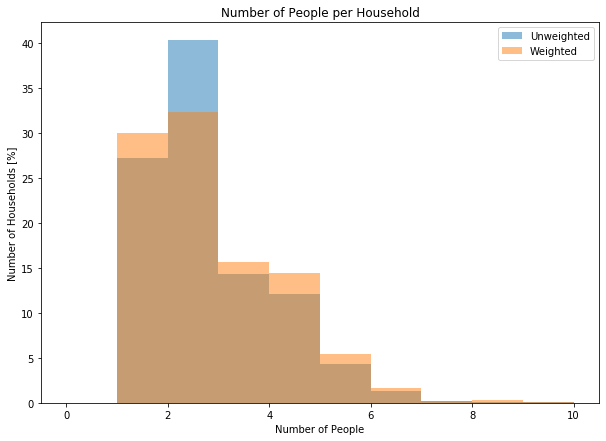

In [15]:
plt.figure(figsize=(10,7))
plt.hist(x=hh_df.NUM_PERS, bins=10, range=[0,10], weights=np.ones(len(hh_df))/len(hh_df)*100, alpha=0.5, label='Unweighted')
plt.hist(x=hh_df.NUM_PERS, bins=10, range=[0,10], weights=hh_df.FINALWEIGHT/hh_df.FINALWEIGHT.sum()*100, alpha=0.5, label='Weighted')
plt.title('Number of People per Household')
plt.xlabel('Number of People')
plt.ylabel('Number of Households [%]')
plt.legend(loc='upper right')
plt.show()

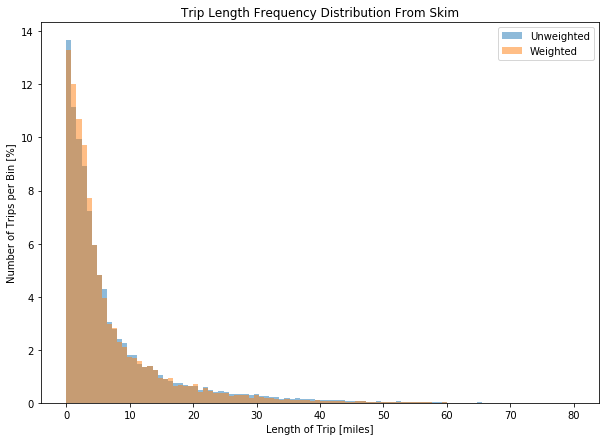

In [16]:
plt.figure(figsize=(10,7))
plt.hist(x=trips_df.DIST, bins=100, range=[0,80], weights=np.ones(len(trips_df))/len(trips_df)*100, alpha=0.5, label='Unweighted')
plt.hist(x=trips_df.DIST, bins=100, range=[0,80], weights=trips_df.FINALWEIGHT/trips_df.FINALWEIGHT.sum()*100, alpha=0.5, label='Weighted')
plt.title('Trip Length Frequency Distribution From Skim')
plt.xlabel('Length of Trip [miles]')
plt.ylabel('Number of Trips per Bin [%]')
plt.legend(loc='upper right')
plt.show()

In [17]:
print("Average Number of Trips per Person:", len(trips_df)/len(persons_df))
print("Average Number of Trips per Household:", len(trips_df) / len(hh_df))
print("Average Number of Tours per Person:", len(tours_df)/len(persons_df))
print("Average Number of Tours Per Household:", len(tours_df)/len(hh_df))

Average Number of Trips per Person: 3.763691965526828
Average Number of Trips per Household: 8.73842181700823
Average Number of Tours per Person: 1.38910897970531
Average Number of Tours Per Household: 3.225189607874778


In [18]:
print("Weighted Average Number of Trips per Person:", trips_df['FINALWEIGHT'].sum() / persons_df['FINALWEIGHT'].sum())
print("Weighted Average Number of Trips per Household:", trips_df['FINALWEIGHT'].sum() / hh_df['FINALWEIGHT'].sum())
print("Weighted Average Number of Tours per Person:", tours_df['FINALWEIGHT'].sum() / persons_df['FINALWEIGHT'].sum())
print("Weighted Average Number of Tours Per Household:", tours_df['FINALWEIGHT'].sum() / hh_df['FINALWEIGHT'].sum())

Weighted Average Number of Trips per Person: 3.892092815555042
Weighted Average Number of Trips per Household: 9.93385391263075
Weighted Average Number of Tours per Person: 1.4420914715951956
Weighted Average Number of Tours Per Household: 3.680674302068113


## Person, Trip, and Tour Categories

In [19]:
survey_purp_dict = {
  1: "Typical home activities",
  2: "Working at home (paid)",
  3: "Work at fixed work location",
  4: "Work at non-fixed work location",
  5: "Work related (off-site meeting)",
  6: "School/studying",
  7: "Volunteering",
  8: "Major purchase shopping (appliances, cars, home furnishings)",
  9: "Other routine shopping (grocery, clothing)",
  10: "Drive-thru food or errands",
  11: "Vehicle service (gas, maintenance)",
  12: "Health care visit",
  13: "Other non-shopping errands",
  14: "Eat out",
  15: "Socialize with friends/relatives",
  16: "Religious or community event",
  17: "Exercise or recreation",
  18: "Attend major special event",
  19: "Drop off/pick up passenger",
  20: "Change travel mode/transfer"}

spa_purp_dict = {
    0: 'HOME',
    1: 'WORK',
    2: 'UNIVERSITY',
    3: 'SCHOOL',
    4: 'ESCORTING',
    5: 'SHOPPING',
    6: 'MAINTENANCE',
    7: 'EAT OUT',
    8: 'SOCIAL/VISIT',
    9: 'DISCRETIONARY',
    11: 'LOOP',
    12: 'CHANGE MODE',
    13: 'OTHER'}

purpose_ct = pd.crosstab(
        index=input_place_df['SURVEY_TPURP'],
        columns=input_place_df['TPURP'],
        margins=True)
purpose_ct.rename(index=survey_purp_dict, columns=spa_purp_dict, inplace=True)
purpose_ct

TPURP,HOME,WORK,SCHOOL,ESCORTING,SHOPPING,MAINTENANCE,EAT OUT,SOCIAL/VISIT,DISCRETIONARY,CHANGE MODE,All
SURVEY_TPURP,,,,,,,,,,,
-9,0,0,0,0,0,0,0,0,13,0,13
-8,0,0,0,0,0,0,0,0,132,0,132
-7,0,0,0,0,0,0,0,0,178,0,178
Typical home activities,62495,0,0,0,0,0,0,0,0,0,62495
Working at home (paid),1034,0,0,0,0,0,0,0,0,0,1034
Work at fixed work location,0,12539,0,0,0,0,0,0,0,0,12539
Work at non-fixed work location,0,0,0,0,0,2230,0,0,0,0,2230
Work related (off-site meeting),0,0,0,0,0,1276,0,0,0,0,1276
School/studying,0,0,6673,0,0,0,0,0,0,0,6673


In [20]:
survey_mode_dict = {
    0: 'APPROPRIATE SKIP',
    1: 'Walk',
    2: 'Bicycle',
    3: 'Motorcycle/moped',
    4: 'Auto / van / truck (as the driver)',
    5: 'Auto / van / truck (as the passenger)',
    6: 'Carpool/vanpool',
    7: 'School bus',
    8: 'Public transit local bus',
    9: 'Dial-a-ride/paratransit',
    10: 'Private bus or shuttle',
    11: 'Taxi/limo',
    12: 'Train/Amtrak',
    13: 'Detroit People Mover',
    14: 'Airplane',
    15: 'Boat/ferry',
    97: 'Something Else',
}

spa_mode_dict = {
    0: 'APPROPRIATE SKIP',
    1: 'SOV',
    2: 'HOV2',
    3: 'HOV3',
    4: 'WALK',
    5: 'BIKE',
    6: 'TAXI',
    7: 'SCHOOLBUS',
    8: 'TRANSIT-LOCAL',
    9: 'TRANSIT-PREMIUM',
    10: 'OTHER'
}

mode_ct = pd.crosstab(
        index=input_place_df['SURVEY_MODE'],
        columns=input_place_df['MODE'],
        margins=True)
mode_ct.rename(index=survey_mode_dict, columns=spa_mode_dict, inplace=True)
mode_ct

MODE,APPROPRIATE SKIP,SOV,HOV2,HOV3,WALK,BIKE,TAXI,SCHOOLBUS,TRANSIT-LOCAL,TRANSIT-PREMIUM,OTHER,All
SURVEY_MODE,,,,,,,,,,,,
APPROPRIATE SKIP,28776,0,0,0,0,0,0,0,0,0,0,28776
Walk,0,0,0,0,7046,0,0,0,0,0,0,7046
Bicycle,0,0,0,0,0,922,0,0,0,0,0,922
Motorcycle/moped,0,176,35,0,0,0,0,0,0,0,0,211
Auto / van / truck (as the driver),0,50400,19170,5510,0,0,0,0,0,0,0,75080
Auto / van / truck (as the passenger),0,1,11948,9774,0,0,0,0,0,0,0,21723
Carpool/vanpool,0,73,132,289,0,0,0,0,0,0,0,494
School bus,0,0,0,0,0,0,0,3156,0,0,0,3156
Public transit local bus,0,0,0,0,0,0,0,0,1629,0,0,1629


In [21]:
processed_mode_dict ={
    1: 'SOV',
    2: 'HOV2',
    3: 'HOV3',
    4: 'WALK',
    5: 'BIKE',
    6: 'WALK-LOCAL',
    7: 'WALK-PREMIUM',
    8: 'WALK-MIXED',
    9: 'PNR-LOCAL',
    10: 'PNR-PREMIUM',
    11: 'PNR-MIXED',
    12: 'KNR-LOCAL',
    13: 'KNR-PREMIUM',
    14: 'KNR-MIXED',
    15: 'SCHOOLBUS',
    16: 'OTHER',
}

preprocess_mode_ct = pd.crosstab(
        index=trips_df['MODE'],
        columns=trips_df['TRIPMODE'],
        margins=True)
preprocess_mode_ct.rename(index=spa_mode_dict, columns=processed_mode_dict, inplace=True)
preprocess_mode_ct

TRIPMODE,SOV,HOV2,HOV3,WALK,BIKE,WALK-LOCAL,WALK-MIXED,PNR-LOCAL,KNR-LOCAL,SCHOOLBUS,OTHER,All
MODE,,,,,,,,,,,,
SOV,50371,34,27,0,0,0,0,24,0,0,0,50456
HOV2,0,31070,24,0,0,0,0,2,8,0,0,31104
HOV3,0,0,15523,0,0,0,0,0,4,0,0,15527
WALK,52,26,3,5567,1,406,0,7,12,109,0,6183
BIKE,4,4,3,0,877,0,0,0,5,1,0,894
TAXI,263,11,2,0,0,0,0,0,3,0,0,279
SCHOOLBUS,0,38,57,0,0,0,0,0,0,2850,0,2945
TRANSIT-LOCAL,0,0,0,0,0,786,0,19,10,0,0,815
TRANSIT-PREMIUM,0,0,0,0,0,8,1,0,0,0,0,9


In [22]:
processed_mode_ct = pd.crosstab(
        index=trips_df['TRIPMODE'],
        columns=trips_df['TOURMODE'],
        margins=True)
processed_mode_ct.rename(index=processed_mode_dict, columns=processed_mode_dict, inplace=True)
processed_mode_ct

TOURMODE,SOV,HOV2,HOV3,WALK,BIKE,WALK-LOCAL,WALK-MIXED,PNR-LOCAL,KNR-LOCAL,SCHOOLBUS,OTHER,All
TRIPMODE,,,,,,,,,,,,
SOV,41722,6388,2439,0,64,29,0,10,3,41,0,50696
HOV2,0,26362,4162,0,52,61,0,6,11,532,0,31186
HOV3,0,0,14958,0,18,41,0,2,3,621,0,15643
WALK,416,401,290,3984,28,307,1,10,7,123,0,5567
BIKE,0,0,0,0,856,9,0,0,10,3,0,878
WALK-LOCAL,0,0,0,0,0,1186,3,3,13,0,0,1205
WALK-MIXED,0,0,0,0,0,0,1,0,0,0,0,1
PNR-LOCAL,0,0,0,0,0,0,0,52,0,0,0,52
KNR-LOCAL,0,0,0,0,0,0,0,0,42,0,0,42


In [23]:
def make_plots(df, col_name, value_dict, title, order, comparison_df=None, source=None, comp_source=None, need_to_process_comp_df=False):
    inv_dict = {num: name for name, num in value_dict.items()}
    df_vc = df[col_name].value_counts(dropna=False)
    df_vc.rename(index=inv_dict, inplace=True)
    print('Unweighted Survery Numbers:\n', df_vc)
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.barplot(y=df_vc/df_vc.sum()*100, x=df_vc.index, order=order)
    plt.ylabel("Counts [%]")
    plt.title(title)
    if col_name != "PERSONTYPE": plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    plt.pie(x=df_vc, labels=df_vc.index, autopct=lambda pct: str.format('{:.1f}%',pct))
    plt.title(title)
    plt.show()

    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    
    df_gpd = df.fillna('NaN').groupby(col_name).sum()
    df_gpd.rename(index=inv_dict, inplace=True)
    if source is not None:
        print('Weighted Numbers for', source, ':\n', df_gpd['FINALWEIGHT'])
    else:
        print('Weighted Numbers:\n', df_gpd['FINALWEIGHT'])
    
    if need_to_process_comp_df:
        comp_df_gpd = comparison_df.fillna(0).groupby(col_name).sum()
        comp_df_gpd.rename(index=inv_dict, inplace=True)
        print('Weighted Numbers for', comp_source, ':\n', comp_df_gpd['FINALWEIGHT'])
        comp_df_gpd['percent'] = comp_df_gpd['FINALWEIGHT']/comp_df_gpd['FINALWEIGHT'].sum()*100
    else:
        comp_df_gpd = comparison_df
    
    if comparison_df is not None:
        combined_df = pd.DataFrame()
        combined_df['percent'] = df_gpd['FINALWEIGHT']/df_gpd['FINALWEIGHT'].sum()*100
        combined_df['source'] = source
        combined_df[col_name] = combined_df.index
        comp_df_gpd['source'] = comp_source
        comp_df_gpd[col_name] = comp_df_gpd.index
        combined_df = combined_df.append(comp_df_gpd)
#         sns.barplot(y=combined_df['percent'], x=combined_df[col_name], hue=combined_df['source'], order=value_dict.keys())
        sns.barplot(y=combined_df['percent'], x=combined_df[col_name], hue=combined_df['source'], order=order)
    else:
#         sns.barplot(y=df_gpd['FINALWEIGHT']/df_gpd['FINALWEIGHT'].sum()*100, x=df_gpd.index, order=value_dict.keys())
        sns.barplot(y=df_gpd['FINALWEIGHT']/df_gpd['FINALWEIGHT'].sum()*100, x=df_gpd.index, order=order)
    
    plt.ylabel("Counts [%]")
    plt.xlabel(title)
    plt.title('Weighted ' + title)
    if col_name != "PERSONTYPE": plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    plt.pie(x=df_gpd['FINALWEIGHT'], labels=df_gpd.index, autopct=lambda pct: str.format('{:.1f}%',pct))
    plt.title('Weighted ' + title)
    plt.show()


Unweighted Survery Numbers:
 FW     10997
NW      4411
RE      4044
ND      3247
PW      2023
PS      1846
US      1528
DS       646
NaN       34
Name: PERSONTYPE, dtype: int64


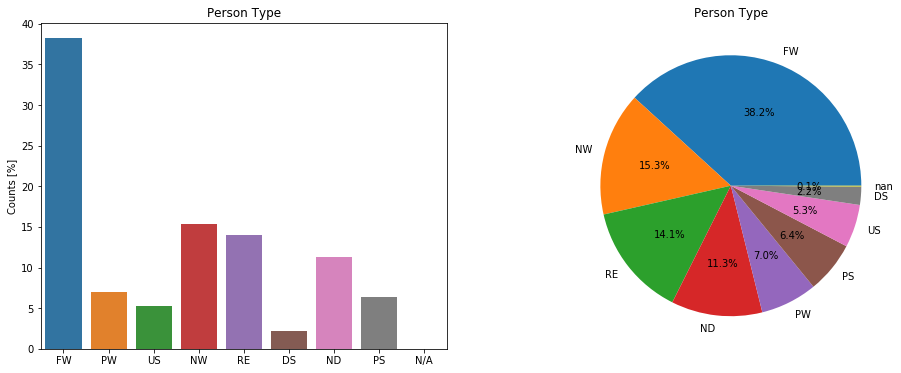

Weighted Numbers for SPA Output :
 PERSONTYPE
FW     1.628709e+06
PW     2.941610e+05
US     3.110160e+05
NW     7.659167e+05
RE     5.348062e+05
DS     1.452924e+05
ND     5.904176e+05
PS     3.658242e+05
N/A    6.825114e+03
Name: FINALWEIGHT, dtype: float64


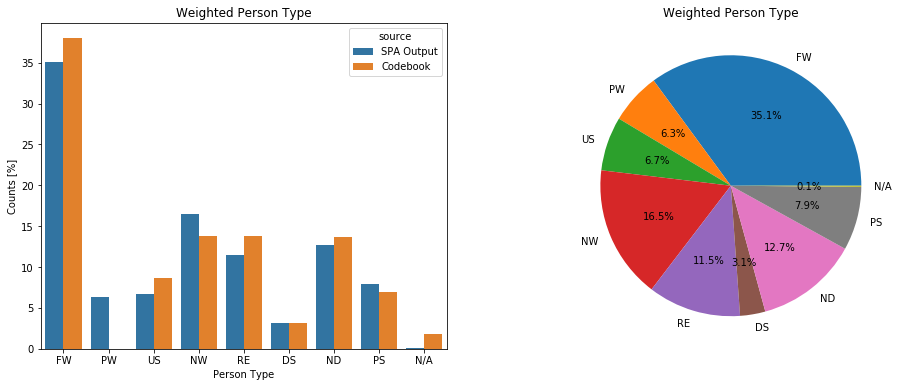

In [24]:
survey_pertype_data = {
    'FW': 38.0,
    'PW': 0,
    'US': 8.7,
    'NW': 13.8,
    'RE': 13.8,
    'DS': 3.2,
    'ND': 13.7,
    'PS': 6.9,
    'N/A': 1.8
}
survey_pertype_df = pd.DataFrame.from_dict(survey_pertype_data, orient='index', columns=['percent'])

NewPerType = {
    'FW' : 1,
    'PW' : 2,
    'US' : 3,
    'NW' : 4,
    'RE' : 5,
    'DS' : 6,
    'ND' : 7,
    'PS' : 8,
    'N/A': 'NaN'
    }

pertype_order = ['FW', 'PW', 'US', 'NW', 'RE', 'DS', 'ND', 'PS', 'N/A']


make_plots(persons_df,
           col_name='PERSONTYPE',
           value_dict=NewPerType,
           title='Person Type',
           order=pertype_order,
           comparison_df=survey_pertype_df,
           source='SPA Output',
           comp_source='Codebook',
           need_to_process_comp_df=False
          )

Explaination of differences between Person Types:
* All persons that are reported as workers are classified under the FW category.  We have yet to see any direct information that can be used to classify Part Time Workers.
* University Students that report that they are employed are assumed to be FW and not US, which account for about 60% of the US PersonType reported in the survey
* We are treating driving age students as those between ages 16 and 19 and reported a 'school' status.  The survey classifies all students ages 16 and 17 as DS.
* Retired individuals in our classification are required to be over age 65.  This is not a requirement in the survey classification.  This also explains some of the difference in Non-Workers.


Unweighted Survery Numbers:
 WORK             10099
MAINTENANCE       5662
DISCRETIONARY     5637
SHOPPING          4602
SCHOOL            4273
ESCORTING         3077
EAT OUT           2399
SOCIAL/VISIT      1832
LOOP              1216
UNIVERSITY        1138
CHANGE MODE         38
Name: TOURPURP, dtype: int64


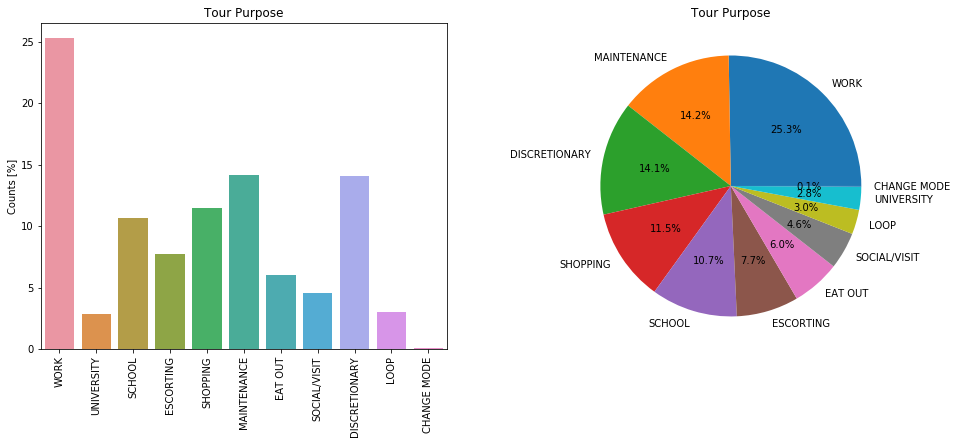

Weighted Numbers for No Distance in Purpose Coding :
 TOURPURP
WORK             1.617810e+06
UNIVERSITY       2.283512e+05
SCHOOL           8.226964e+05
ESCORTING        6.011952e+05
SHOPPING         7.490542e+05
MAINTENANCE      8.864340e+05
EAT OUT          3.867568e+05
SOCIAL/VISIT     3.125113e+05
DISCRETIONARY    8.934877e+05
LOOP             1.931779e+05
CHANGE MODE      4.109974e+03
Name: FINALWEIGHT, dtype: float64
Weighted Numbers for With Distance in Purpose Coding :
 TOURPURP
WORK             1.615469e+06
UNIVERSITY       2.300211e+05
SCHOOL           8.227914e+05
ESCORTING        6.035905e+05
SHOPPING         7.461055e+05
MAINTENANCE      8.868251e+05
EAT OUT          3.851412e+05
SOCIAL/VISIT     3.162868e+05
DISCRETIONARY    8.925532e+05
LOOP             1.931779e+05
CHANGE MODE      4.109974e+03
Name: FINALWEIGHT, dtype: float64


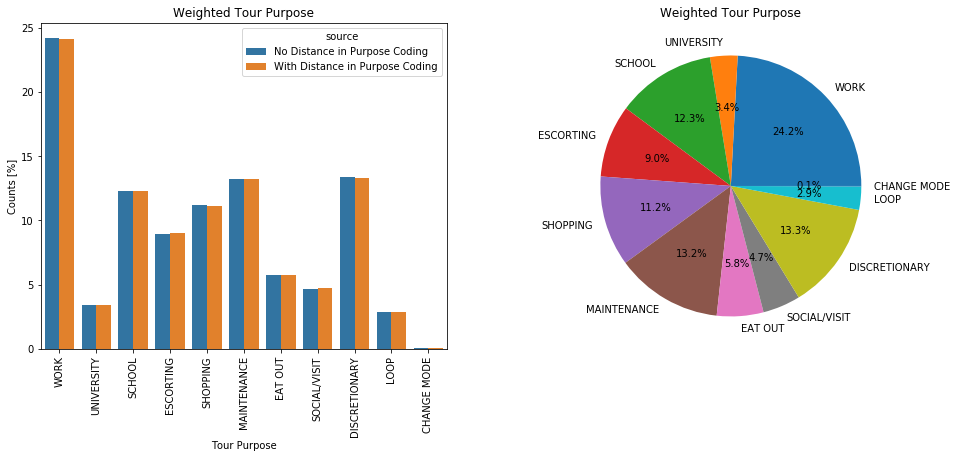

Unweighted Survery Numbers:
 HOME             35696
MAINTENANCE      13991
WORK             11685
SHOPPING         11596
ESCORTING         8742
DISCRETIONARY     7755
EAT OUT           7428
SCHOOL            4774
SOCIAL/VISIT      3892
UNIVERSITY        1499
LOOP              1216
CHANGE MODE         30
Name: DEST_PURP, dtype: int64


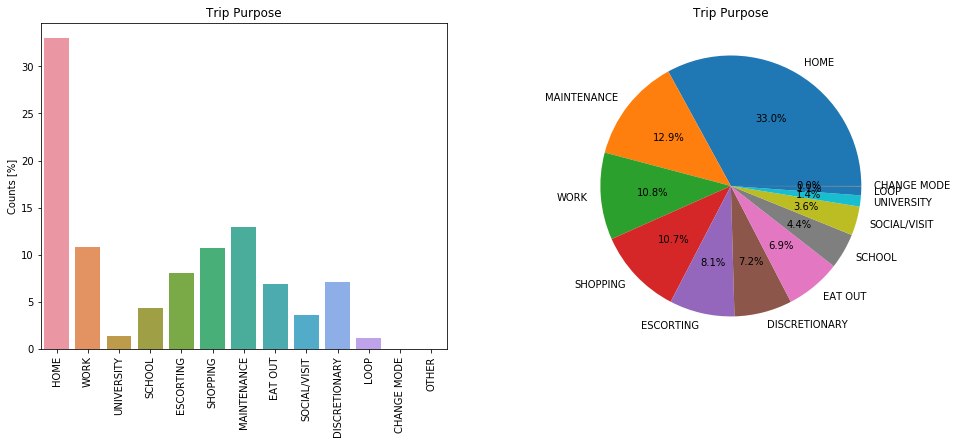

Weighted Numbers:
 DEST_PURP
HOME             5.995930e+06
WORK             1.872952e+06
UNIVERSITY       2.938103e+05
SCHOOL           9.202865e+05
ESCORTING        1.727827e+06
SHOPPING         1.827459e+06
MAINTENANCE      2.158912e+06
EAT OUT          1.192522e+06
SOCIAL/VISIT     6.615449e+05
DISCRETIONARY    1.222930e+06
LOOP             1.931877e+05
CHANGE MODE      3.501293e+03
Name: FINALWEIGHT, dtype: float64


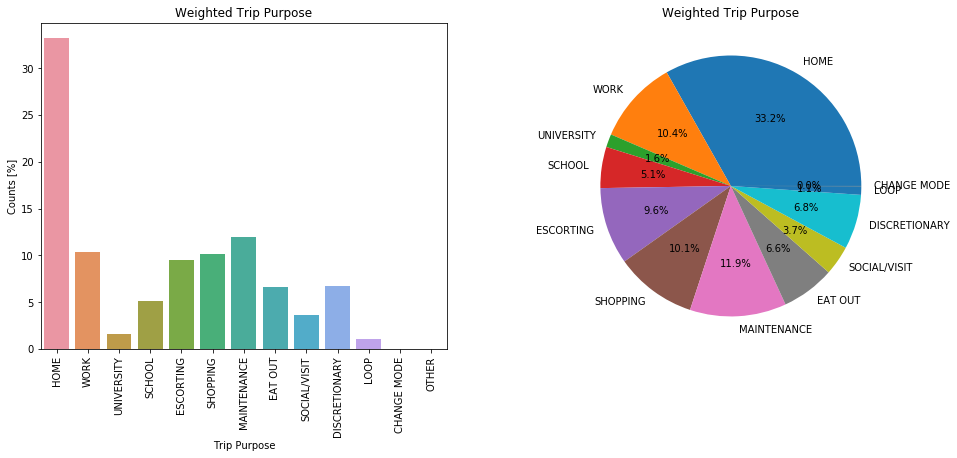

In [25]:
NewPurp = {     #map new purpose name to purpose code
    'HOME':         0,
    'WORK':         1,
    'UNIVERSITY':   2,
    'SCHOOL':       3,
    'ESCORTING':    4,
    'SHOPPING':     5,
    'MAINTENANCE':  6,
    'EAT OUT':      7,
    'SOCIAL/VISIT': 8,
    'DISCRETIONARY':9,
    'LOOP':         11,
    'CHANGE MODE':  12,
    'OTHER':        13
    }

tour_order = [
    'WORK', 
    'UNIVERSITY', 
    'SCHOOL', 
    'ESCORTING', 
    'SHOPPING', 
    'MAINTENANCE', 
    'EAT OUT', 
    'SOCIAL/VISIT', 
    'DISCRETIONARY', 
    'LOOP', 
    'CHANGE MODE']

trip_order = NewPurp.keys()

make_plots(tours_df,
           col_name='TOURPURP',
           value_dict=NewPurp, 
           title='Tour Purpose',
           order=tour_order,
           comparison_df=tours_dist_df,
           source='No Distance in Purpose Coding',
           comp_source='With Distance in Purpose Coding',
           need_to_process_comp_df=True
          )

make_plots(trips_df,
           col_name='DEST_PURP',
           value_dict=NewPurp, 
           title='Trip Purpose',
           order=trip_order
          )

Unweighted Survery Numbers:
 WORK             10099
MAINTENANCE       5662
DISCRETIONARY     5637
SHOPPING          4602
SCHOOL            4273
ESCORTING         3077
EAT OUT           2399
SOCIAL/VISIT      1832
LOOP              1216
UNIVERSITY        1138
CHANGE MODE         38
Name: TOURPURP, dtype: int64


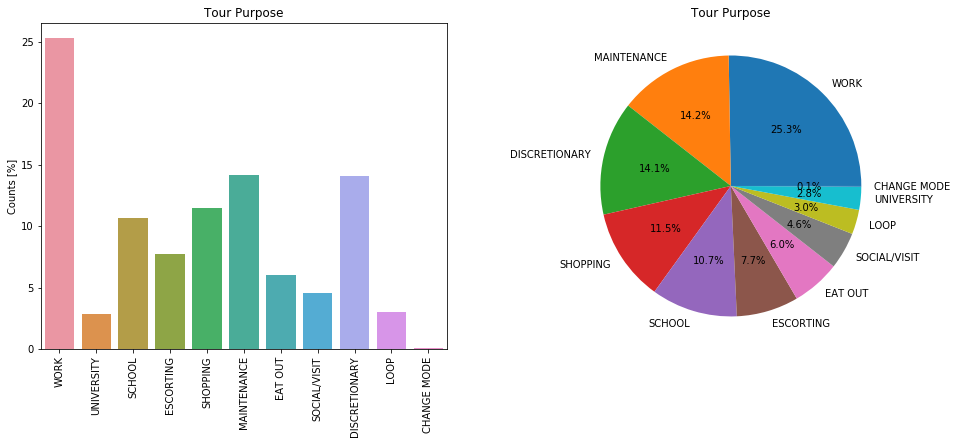

Weighted Numbers:
 TOURPURP
WORK             1.617810e+06
UNIVERSITY       2.283512e+05
SCHOOL           8.226964e+05
ESCORTING        6.011952e+05
SHOPPING         7.490542e+05
MAINTENANCE      8.864340e+05
EAT OUT          3.867568e+05
SOCIAL/VISIT     3.125113e+05
DISCRETIONARY    8.934877e+05
LOOP             1.931779e+05
CHANGE MODE      4.109974e+03
Name: FINALWEIGHT, dtype: float64


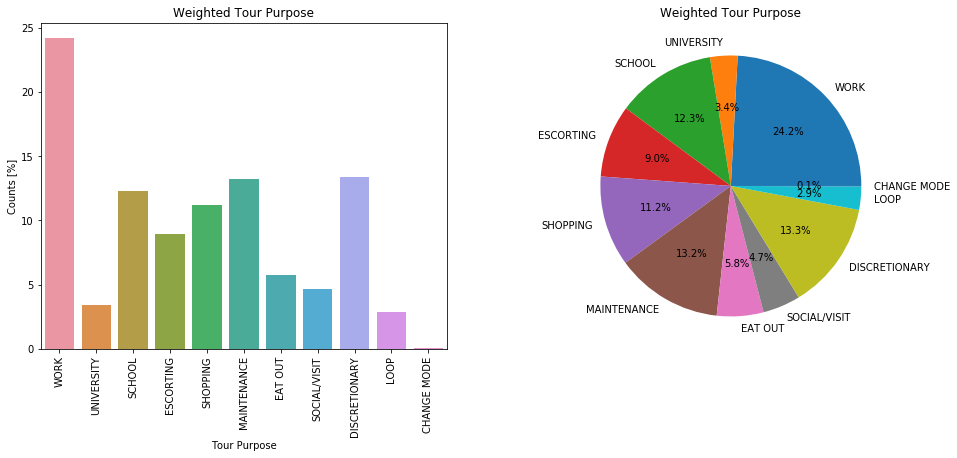

In [26]:
make_plots(tours_df,
           col_name='TOURPURP',
           value_dict=NewPurp, 
           title='Tour Purpose',
           order=tour_order,
          )

Unweighted Survery Numbers:
 SOV           16205
HOV2          11395
HOV3           7281
WALK           2191
SCHOOLBUS      1781
WALK-LOCAL      605
BIKE            427
KNR-LOCAL        33
PNR-LOCAL        30
OTHER            24
WALK-MIXED        1
Name: TOURMODE, dtype: int64


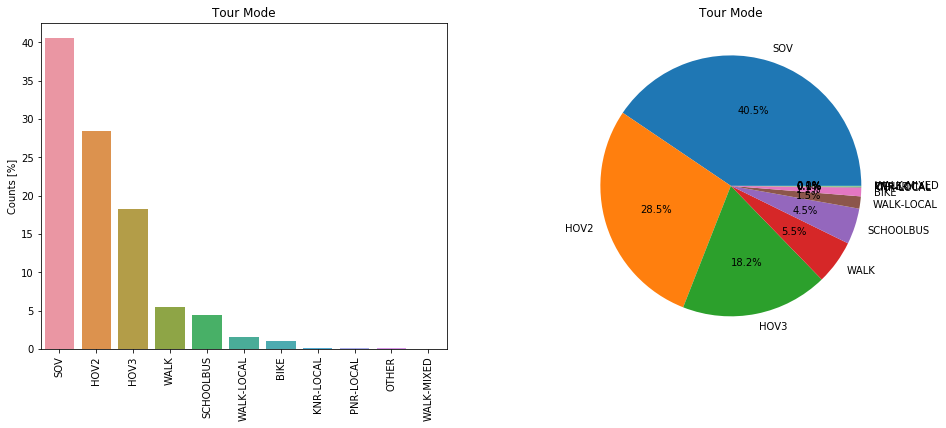

Weighted Numbers:
 TOURMODE
SOV           2.504796e+06
HOV2          1.802053e+06
HOV3          1.424649e+06
WALK          4.252973e+05
BIKE          9.213711e+04
WALK-LOCAL    1.380267e+05
WALK-MIXED    1.485406e+02
PNR-LOCAL     6.231049e+03
KNR-LOCAL     1.048536e+04
SCHOOLBUS     2.894765e+05
OTHER         2.283625e+03
Name: FINALWEIGHT, dtype: float64


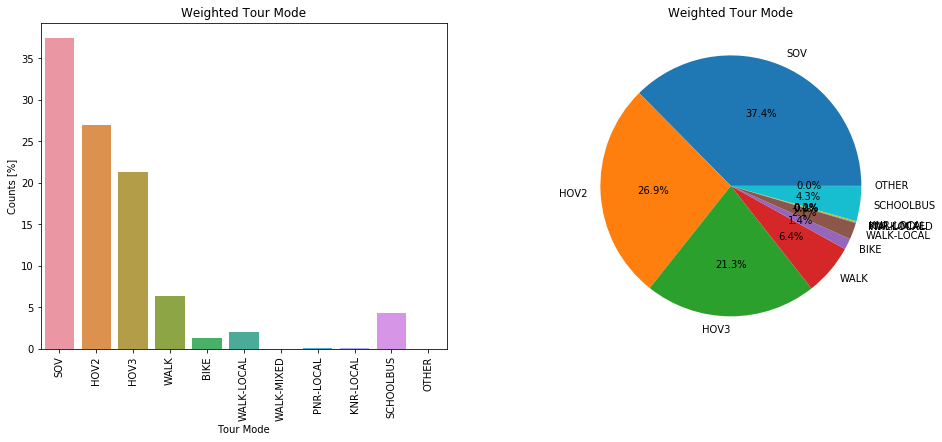

Unweighted Survery Numbers:
 SOV           50696
HOV2          31186
HOV3          15643
WALK           5567
SCHOOLBUS      2960
WALK-LOCAL     1205
BIKE            878
OTHER            74
PNR-LOCAL        52
KNR-LOCAL        42
WALK-MIXED        1
Name: TRIPMODE, dtype: int64


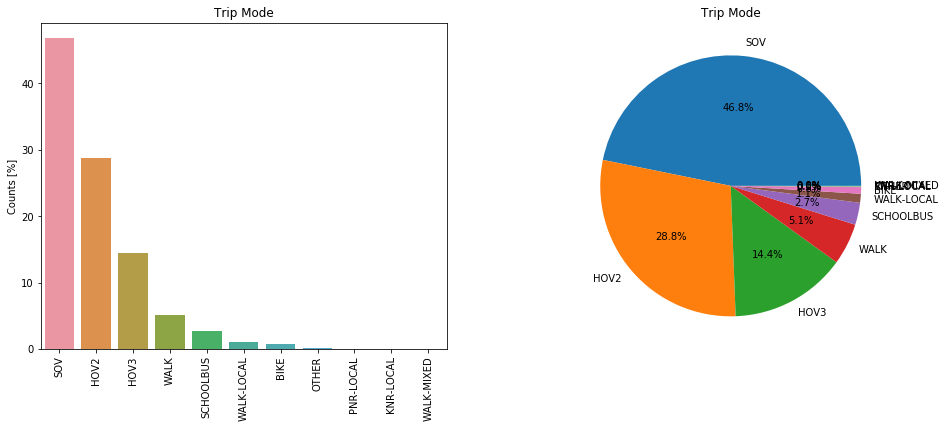

Weighted Numbers:
 TRIPMODE
SOV           7.881004e+06
HOV2          5.034615e+06
HOV3          3.047164e+06
WALK          1.121037e+06
BIKE          1.919365e+05
WALK-LOCAL    2.792076e+05
WALK-MIXED    1.485406e+02
PNR-LOCAL     1.095246e+04
KNR-LOCAL     1.363240e+04
SCHOOLBUS     4.849718e+05
OTHER         6.193212e+03
Name: FINALWEIGHT, dtype: float64


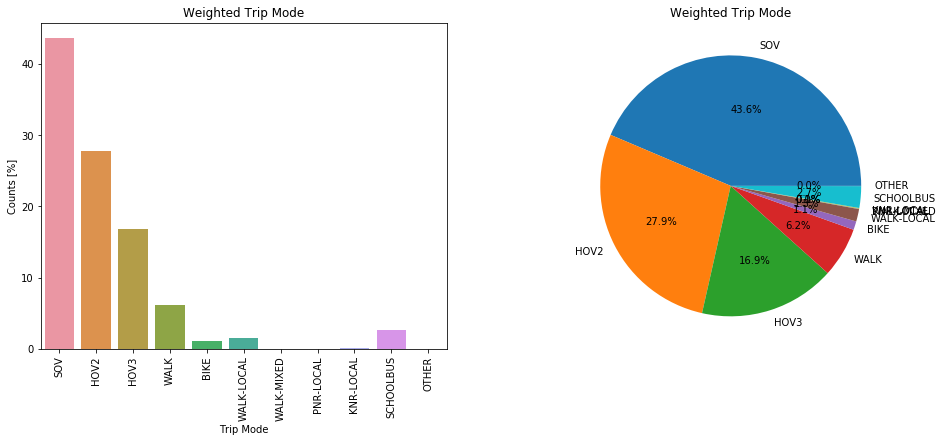

In [27]:
NewTourMode = {
    'SOV': 1,
    'HOV2': 2,
    'HOV3': 3,
    'WALK': 4,
    'BIKE': 5,
    'WALK-LOCAL': 6,
    'WALK-PREMIUM': 7,
    'WALK-MIXED': 8,
    'PNR-LOCAL': 9,
    'PNR-PREMIUM': 10,
    'PNR-MIXED': 11,
    'KNR-LOCAL': 12,
    'KNR-PREMIUM': 13,
    'KNR-MIXED': 14,
    'SCHOOLBUS': 15,
    'OTHER': 16
}

NewTripMode = {
    'SOV': 1,
    'HOV2': 2,
    'HOV3': 3,
    'WALK': 4,
    'BIKE': 5,
    'WALK-LOCAL': 6,
    'WALK-PREMIUM': 7,
    'WALK-MIXED': 8,
    'PNR-LOCAL': 9,
    'PNR-PREMIUM': 10,
    'PNR-MIXED': 11,
    'KNR-LOCAL': 12,
    'KNR-PREMIUM': 13,
    'KNR-MIXED': 14,
    'SCHOOLBUS': 15,
    'OTHER': 16
}

make_plots(tours_df, col_name='TOURMODE', value_dict=NewTourMode, title='Tour Mode', order=None)
make_plots(trips_df, col_name='TRIPMODE', value_dict=NewTripMode, title='Trip Mode', order=None)

## Average Number of Stops by Trip Purpose

Stop is defined at not being the primary tour purpose destination

In [28]:
trips_df['is_stop'] = trips_df['DEST_IS_TOUR_DEST'].apply(lambda x: 0 if x==1 else 1)
trips_df['NUM_STOPS'] = trips_df.groupby(['HH_ID','PER_ID','TOUR_ID'])["is_stop"].transform('sum')

stops_per_tour_by_purpose = trips_df.groupby(['TOURPURP'])['NUM_STOPS'].mean()

inv_dict = {num: name for name, num in NewPurp.items()}
stops_per_tour_by_purpose.rename(index=inv_dict, inplace=True)
stops_per_tour_by_purpose

TOURPURP
WORK             2.385967
UNIVERSITY       2.515457
SCHOOL           1.863402
ESCORTING        2.297878
SHOPPING         2.778399
MAINTENANCE      3.178757
EAT OUT          1.894880
SOCIAL/VISIT     2.220675
DISCRETIONARY    2.474824
LOOP             0.000000
CHANGE MODE      1.911765
Name: NUM_STOPS, dtype: float64

In [29]:
cols=[
    'HH_ID',
    'PER_ID',
    'TOUR_ID',
    'ORIG_PURP',
    'DEST_PURP',
    'TOURPURP',
    'is_stop',
    'NUM_STOPS'
]
# trips_df[cols].head(20)

In [30]:
weighted_mean = lambda x: np.average(x, weights=trips_df.loc[x.index, 'FINALWEIGHT'])
weighted_stops_per_tour_by_purpose = trips_df.groupby(['TOURPURP'])['NUM_STOPS'].agg(weighted_mean)

inv_dict = {num: name for name, num in NewPurp.items()}
weighted_stops_per_tour_by_purpose.rename(index=inv_dict, inplace=True)
weighted_stops_per_tour_by_purpose

TOURPURP
WORK             2.644716
UNIVERSITY       2.387334
SCHOOL           1.970970
ESCORTING        2.372408
SHOPPING         2.738496
MAINTENANCE      3.122949
EAT OUT          1.768330
SOCIAL/VISIT     2.073342
DISCRETIONARY    2.505864
LOOP             0.000000
CHANGE MODE      1.898804
Name: NUM_STOPS, dtype: float64

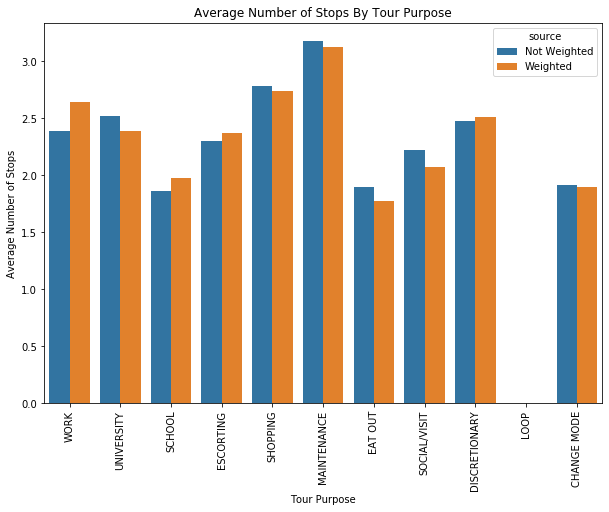

In [31]:
weighted_stops_by_purp_df = pd.DataFrame()
weighted_stops_by_purp_df['purpose'] = weighted_stops_per_tour_by_purpose.index
weighted_stops_by_purp_df['avg_stops'] = weighted_stops_per_tour_by_purpose.to_numpy()
weighted_stops_by_purp_df['source'] = 'Weighted'

stops_by_purp_df = pd.DataFrame()
stops_by_purp_df['purpose'] = stops_per_tour_by_purpose.index
stops_by_purp_df['avg_stops'] = stops_per_tour_by_purpose.to_numpy()
stops_by_purp_df['source'] = 'Not Weighted'

combined_df = stops_by_purp_df.append(weighted_stops_by_purp_df)

plt.figure(figsize=(10,7))
sns.barplot(y=combined_df['avg_stops'], x=combined_df['purpose'], hue=combined_df['source'])
plt.title("Average Number of Stops By Tour Purpose")
plt.xlabel("Tour Purpose")
plt.xticks(rotation=90)
plt.ylabel("Average Number of Stops")
plt.show()